In [ ]:
Business Understanding


In [ ]:
Data Understanding

In [ ]:
Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [3]:
# Loading the datasets into DataFrames

stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
tests = pd.read_csv("test.csv")
transactions = pd.read_csv("transactions.csv")
holidays = pd.read_csv("holidays_events.csv")
oil = pd.read_csv("oil.csv")

In [10]:
#Exploring the various dataset
#stores.info()
#train.info()
#tests.info()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [15]:
tests.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


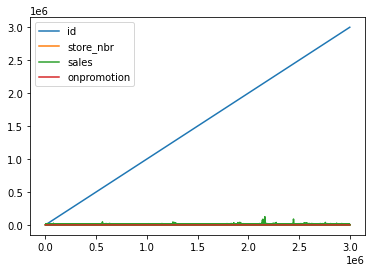

In [26]:
train.plot()
plt.show()

In [16]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0
1,1,2013-01-01,1,BABY CARE,0.000000000,0
2,2,2013-01-01,1,BEAUTY,0.000000000,0
3,3,2013-01-01,1,BEVERAGES,0.000000000,0
4,4,2013-01-01,1,BOOKS,0.000000000,0


In [23]:
#merging the 5 datasets
df_train1 = train.merge(transactions, on = ['date', 'store_nbr'], how='left')
df_train1 = df_train1.merge(stores, on = 'store_nbr', how='left')
df_train1 = df_train1.merge(df_oil, on = 'date', how='left')
df_train1 = train.merge(holidays, on = 'date', how='left')
#df_train1 = df_train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
transactions.info()
df_train1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13


In [25]:
#Breaking the year column into day, month, year, day of the week, and week so we can aggregate the data by those parameters
df_train1['date'] = pd.to_datetime(df_train1['date'])
df_train1['year'] = df_train1['date'].dt.year
df_train1['month'] = df_train1['date'].dt.month
df_train1['week'] = df_train1['date'].dt.isocalendar().week
df_train1['quarter'] = df_train1['date'].dt.quarter
df_train1['day_of_week'] = df_train1['date'].dt.day_name()
df_train1[:2]

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,2013,1,1,1,Tuesday
